In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Problem 5

We solve the nonlinear system of the first order equations for a simple pendulum

$
\begin{cases}
    \theta'(t) = v(t) \\
    v'(t) = \frac{-g}{L}\sin{\theta(t)}
\end{cases}
$

In [81]:
g = 9.81
L = 1
t0 = 0.
tf = 15
t_eval = linspace(t0, tf, 200)
u0 = array([0.3, 0])

In [82]:
from scipy.integrate import solve_ivp

In [83]:
def f(t, u):
    f0 = u[1]
    f1 = -g/L*sin(u[0])
    return array([f0, f1])

In [84]:
solution = solve_ivp(f, (t0, tf), u0, t_eval=t_eval, dense_output=True)

The exact solution is in the form

$\theta(t) = \theta_0\cos\left(\sqrt{\frac{g}{L}}t\right) + v_0\sqrt{\frac{L}{g}}\sin{\left(\sqrt{\frac{g}{L}}t\right)}$

In [85]:
u_exact = lambda t: u0[0]*cos(sqrt(g/L)*t) + u0[1]/(sqrt(g/L))*sin(sqrt(g/L)*t)

For a small $\theta_0$ the numerical solution matches well with the exact one 

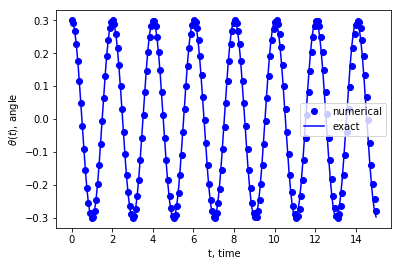

In [86]:
plot(solution.t, solution.y[0, :], 'bo', label="numerical")
plot(solution.t, u_exact(solution.t), 'b-', label="exact")
xlabel("t, time")
ylabel(r"$\theta(t)$, angle")
legend()
show()

Now let's try $\theta_0$ = 3.1 which is pretty close to $\pi$ -- the vertical position

In [87]:
tf = 15
u0 = array([3.1, 0])

In [88]:
solution = solve_ivp(f, (t0, tf), u0, t_eval=t_eval, method='RK45', dense_output=True)

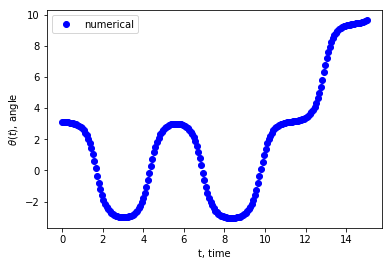

In [89]:
plot(solution.t, solution.y[0, :], 'bo', label="numerical")
#plot(solution.t, u_exact(solution.t), 'b-', label="real")
xlabel("t, time")
ylabel(r"$\theta(t)$, angle")
legend()
show()

For the first two periodes the solution looks okay: it represents the wide oscillations with the stopping points around the vertical position. Then the solution fails: the pendulum goes through the point $\pi$ which is physically impossible: the penundlum does not have enough kinetic energy for this (the initial speed is still zero)

Now we try $\theta_0$ = 3.141 which is slightly less than $\pi$

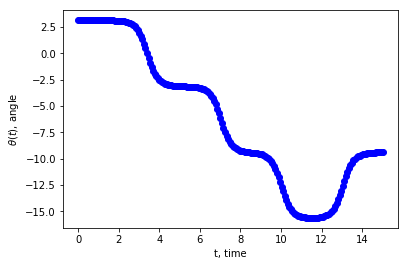

In [90]:
tf = 40
u0 = array([3.1414, 0])
solution = solve_ivp(f, (t0, tf), u0, t_eval=t_eval, method='RK45', dense_output=True)
plot(solution.t, solution.y[0, :], 'bo', label="calculated")
#plot(solution.t, u_exact(solution.t), 'b-', label="real")
xlabel("t, time")
ylabel(r"$\theta(t)$, angle")
show()

Now the solution fails after the first half of a period with going through $\pi$

Then we try $\theta_0$ = 3.143 which is slightly larger than $\pi$

In [91]:
tf = 15
u0 = array([3.143, 0])

In [92]:
solution = solve_ivp(f, (t0, tf), u0, t_eval=t_eval, method='RK45', dense_output=True)

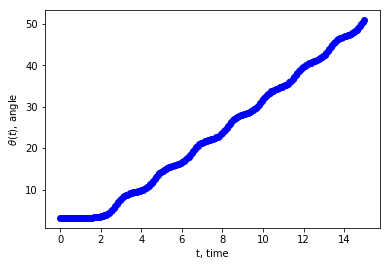

In [93]:
plot(solution.t, solution.y[0, :], 'bo', label="calculated")
#plot(solution.t, u_exact(solution.t), 'b-', label="real")
xlabel("t, time")
ylabel(r"$\theta(t)$, angle")
show()

The solution does not make physical sense either

Now we try to increase the tolerance of the method

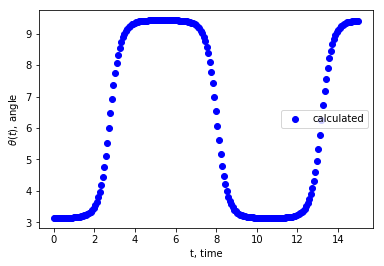

In [95]:
tf = 15
u0 = array([3.143, 0])
solution = solve_ivp(f, (t0, tf), u0, t_eval=t_eval, method='RK45', rtol=1e-7,  dense_output=True)
plot(solution.t, solution.y[0, :], 'bo', label="calculated")
#plot(solution.t, u_exact(solution.t), 'b-', label="real")
xlabel("t, time")
ylabel(r"$\theta(t)$, angle")
legend()
show()

This fixes the solution: it represents oscillations with the angle aplitude in between $2\pi$ again